# Idealized Cape Runs

Here I'm showing my latest smooth and rough bathymetries with $C_D = 10^{-2}$ and $z_r = 0.07$ m

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pressure_tools
import os
from cmocean import cm

%matplotlib inline

In [48]:
# Define paths
path = '/data/bmoorema/results/pond/bathy_long'
prefix = 'SalishSeaIdeal_1h_20170701_20170706'
runIDs = ['smooth_base', 'rough_base']

***

### Surface height

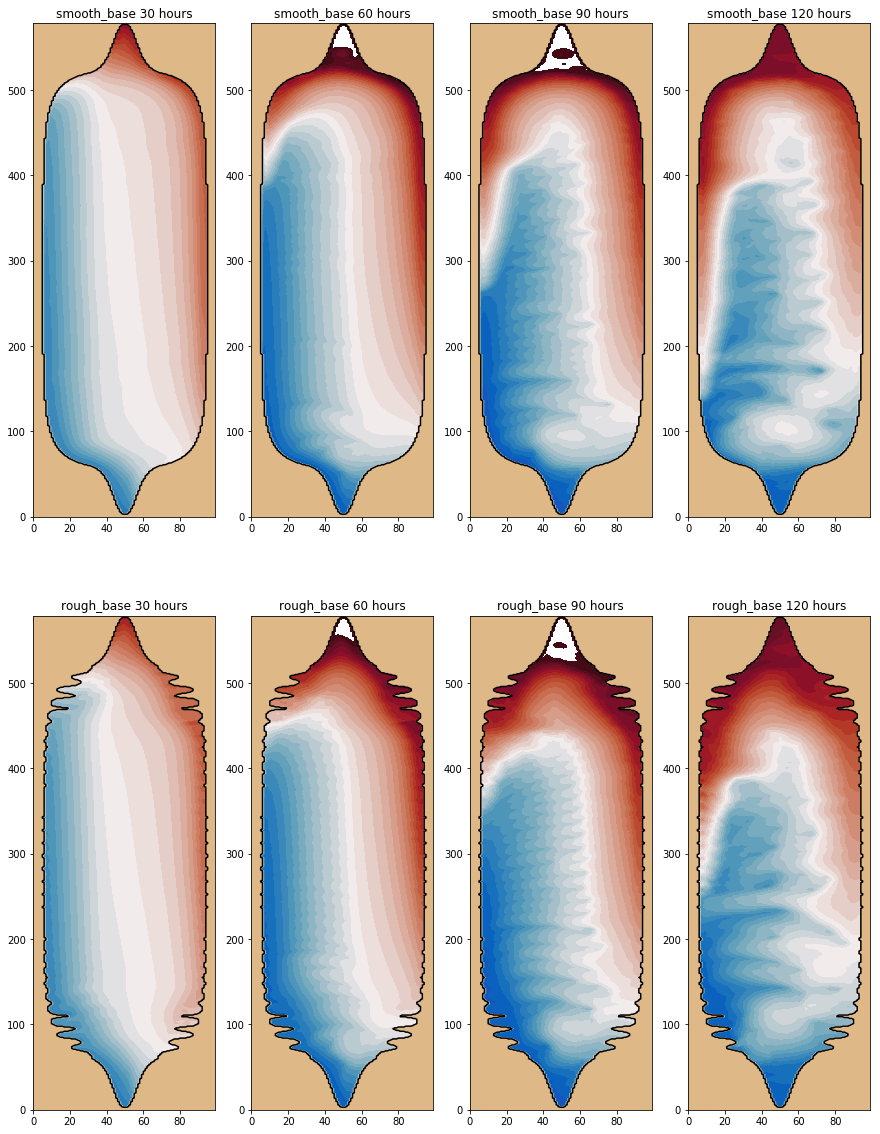

In [49]:
# Plot surface height
fig, axs = plt.subplots(2, 4, figsize=(15, 20))
for row, runID in zip(axs, runIDs):
    mask = xr.open_dataset(os.path.join(path, f'SalishSeaPond_{runID}_S4d', 'mesh_mask.nc'))
    T = xr.open_dataset(os.path.join(path, f'SalishSeaPond_{runID}_S4d/{prefix}_grid_T.nc'))
    for ax, t in zip(row, [30, 60, 90, 120]):
        ax.contourf(T.x, T.y, T.sossheig[t, ...], levels=np.arange(-0.09, 0.1, 0.005), cmap=cm.balance)
        ax.contourf(T.x, T.y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='burlywood')
        ax.contour(T.x, T.y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
        ax.set_title(f'{runID} {t} hours')

***

### Pressure at 50 m

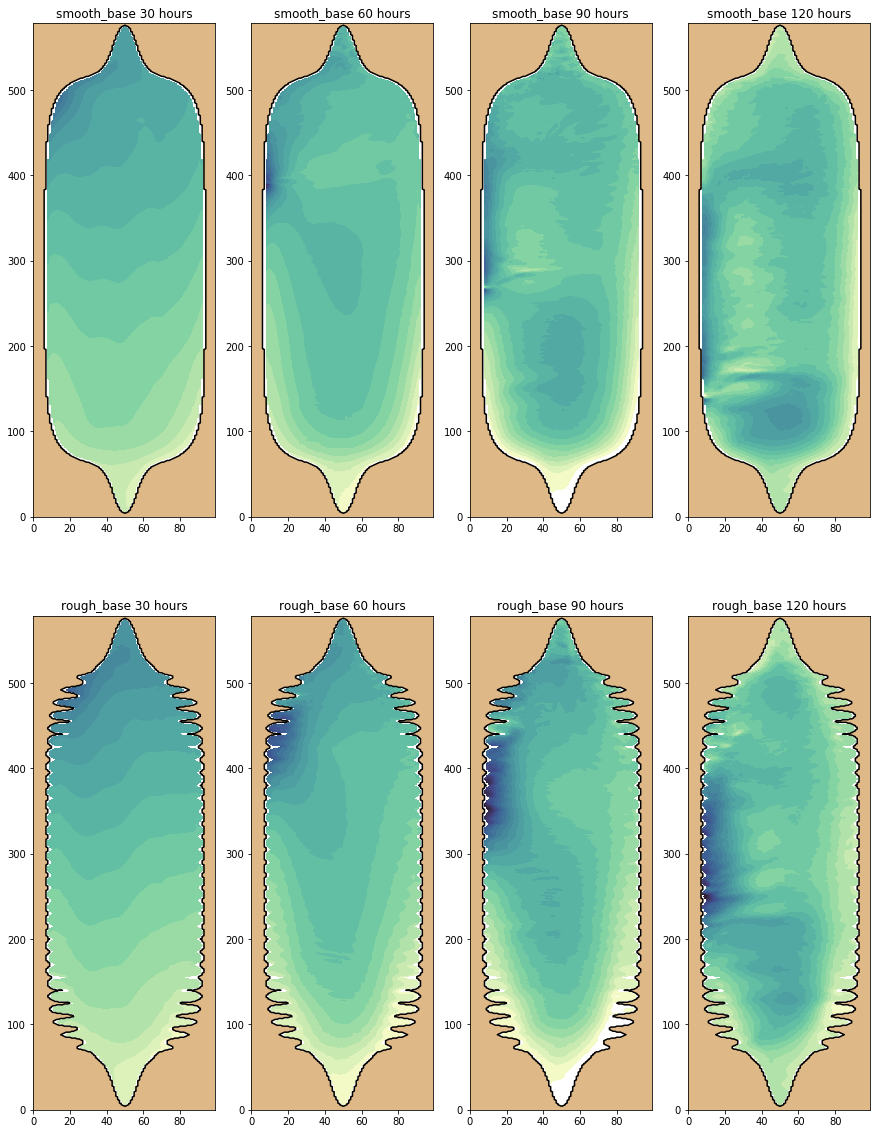

In [50]:
# Plot pressure at 50 m
fig, axs = plt.subplots(2, 4, figsize=(15, 20))
for row, runID in zip(axs, runIDs):
    for ax, t in zip(row, [30, 60, 90, 120]):
        maskfile = os.path.join(path, f'SalishSeaPond_{runID}_S4d', 'mesh_mask.nc')
        params = pressure_tools.load_results(t, os.path.join(path, f'SalishSeaPond_{runID}_S4d'), prefix, maskfile)
        GEO = pressure_tools.calc_geostrophic_velocities(24, params)
        ax.contourf(params['x'], params['y'], GEO['pressure']*1e-4, levels=np.arange(48.978, 49.002, 0.001), cmap=cm.deep)
        ax.contourf(params['x'], params['y'], params['tmask'][22, ...], levels=[-0.01, 0.01], colors='burlywood')
        ax.contour(params['x'], params['y'], params['tmask'][22, ...], levels=[-0.01, 0.01], colors='k')
        ax.set_title(f'{runID} {t} hours')

***

### Surface tracer

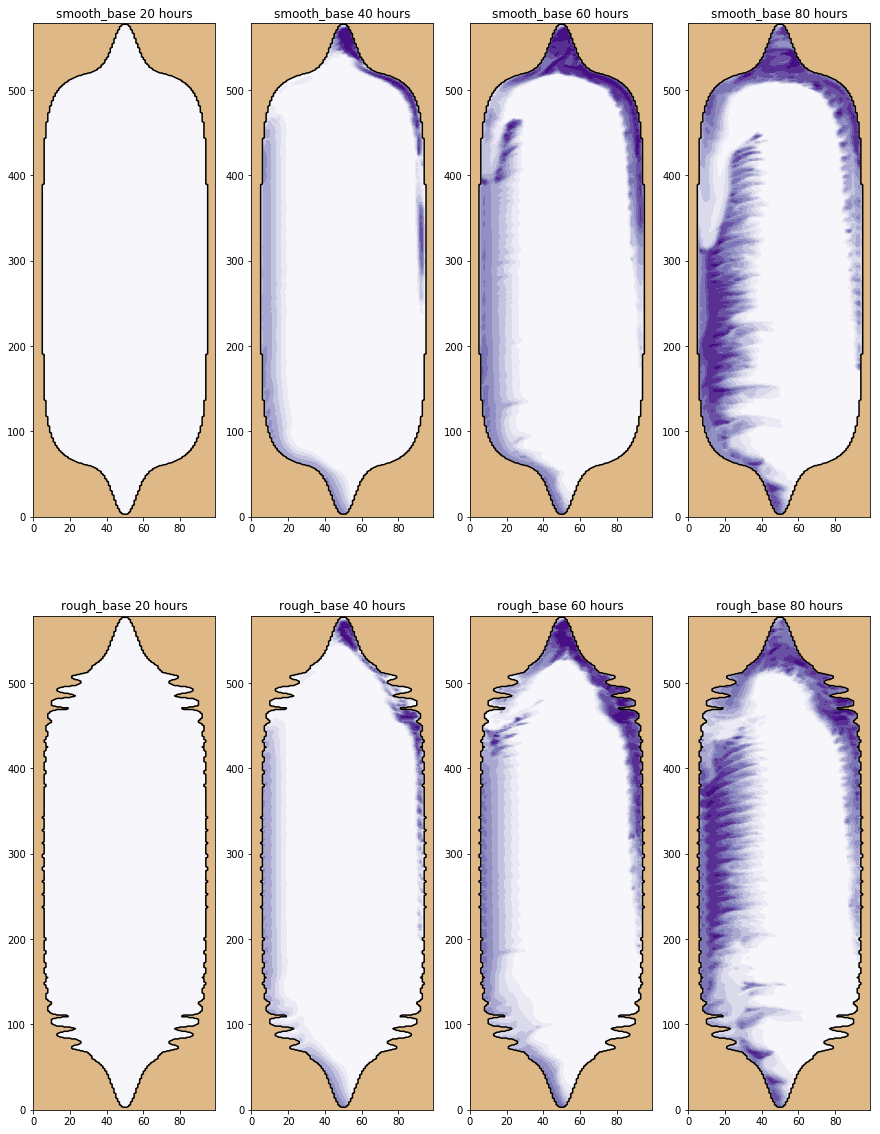

In [51]:
# Plot surface tracer
fig, axs = plt.subplots(2, 4, figsize=(15, 20))
for row, runID in zip(axs, runIDs):
    mask = xr.open_dataset(os.path.join(path, f'SalishSeaPond_{runID}_S4d', 'mesh_mask.nc'))
    T = xr.open_dataset(os.path.join(path, f'SalishSeaPond_{runID}_S4d/{prefix}_grid_T.nc'))
    for ax, t in zip(row, [20, 40, 60, 80]):
        ax.contourf(T.x, T.y, T.tracer20m[t, 0, ...], levels=np.arange(0, 1.1, 0.1), cmap=plt.get_cmap('Purples'))
        ax.contourf(T.x, T.y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='burlywood')
        ax.contour(T.x, T.y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
        ax.set_title(f'{runID} {t} hours')

***

### Tracer cross-section

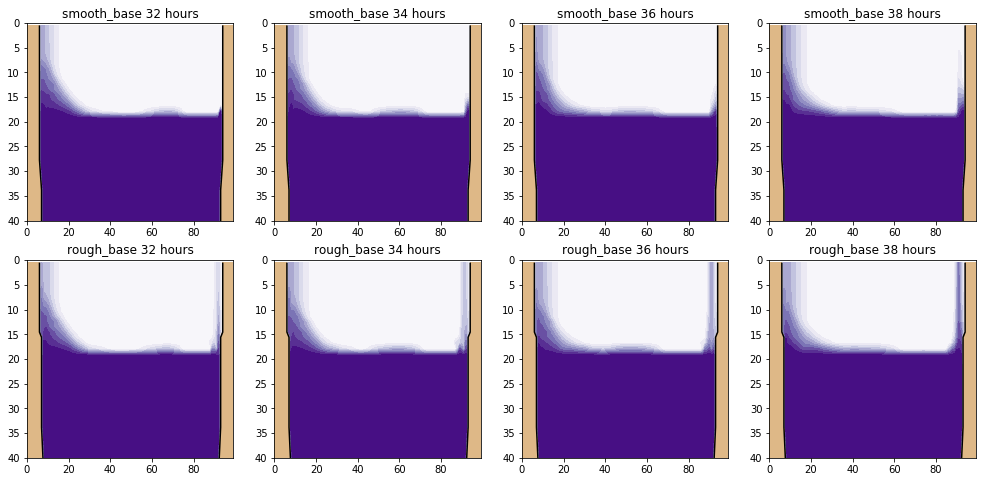

In [60]:
# Plot tracer cross-section
fig, axs = plt.subplots(2, 4, figsize=(17, 8))
for row, runID in zip(axs, runIDs):
    mask = xr.open_dataset(os.path.join(path, f'SalishSeaPond_{runID}_S4d', 'mesh_mask.nc'))
    T = xr.open_dataset(os.path.join(path, f'SalishSeaPond_{runID}_S4d/{prefix}_grid_T.nc'))
    for ax, t in zip(row, [32, 34, 36, 38]):
        ax.contourf(T.x, T.deptht, T.tracer20m[t, :, 400, :], levels=np.arange(0, 1.1, 0.1), cmap=plt.get_cmap('Purples'))
        ax.contourf(T.x, T.deptht, mask.tmask[0, :, 400, :], levels=[-0.01, 0.01], colors='burlywood')
        ax.contour(T.x, T.deptht, mask.tmask[0, :, 400, :], levels=[-0.01, 0.01], colors='k')
        ax.set_ylim([40, 0])
        ax.set_title(f'{runID} {t} hours')

***

### Velocity cross-section

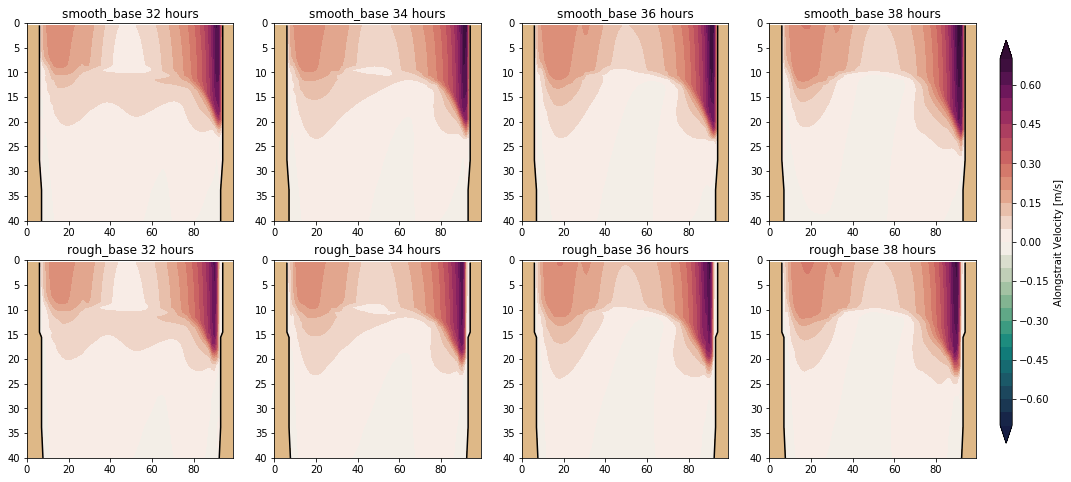

In [89]:
# Plot velocity cross-section
fig, axs = plt.subplots(2, 4, figsize=(17, 8))
cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
for row, runID in zip(axs, runIDs):
    mask = xr.open_dataset(os.path.join(path, f'SalishSeaPond_{runID}_S4d', 'mesh_mask.nc'))
    V = xr.open_dataset(os.path.join(path, f'SalishSeaPond_{runID}_S4d/{prefix}_grid_V.nc'))
    for ax, t in zip(row, [32, 34, 36, 38]):
        c = ax.contourf(V.x, V.depthv, V.vomecrty[t, :, 400, :], levels=np.arange(-0.7, 0.71, 0.05), cmap=cm.curl, extend='both')
        ax.contourf(V.x, V.depthv, mask.tmask[0, :, 400, :], levels=[-0.01, 0.01], colors='burlywood')
        ax.contour(V.x, V.depthv, mask.tmask[0, :, 400, :], levels=[-0.01, 0.01], colors='k')
        ax.set_ylim([40, 0])
        ax.set_title(f'{runID} {t} hours')
fig.colorbar(c, cax=cax, label='Alongstrait Velocity [m/s]')
plt.show()

***

### Vertical diffusivity cross-section

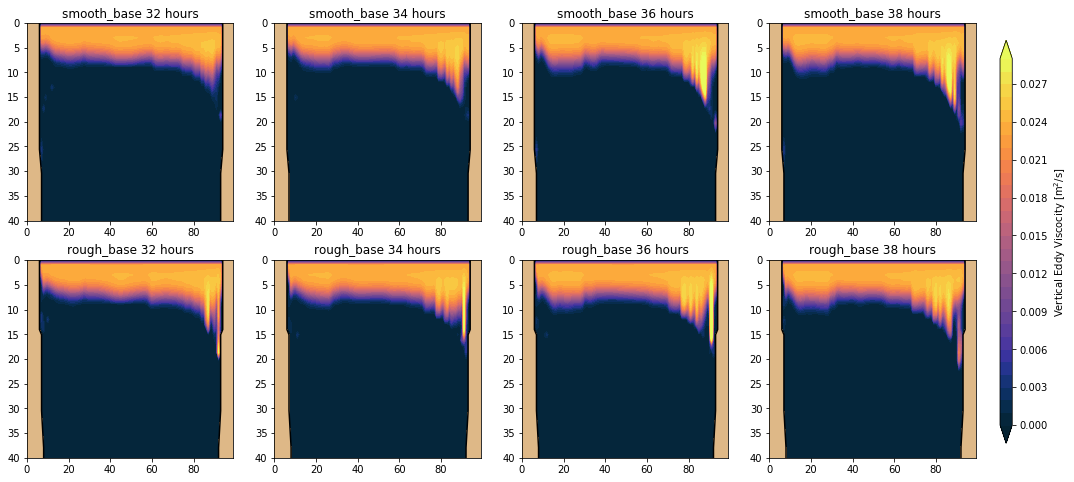

In [90]:
# Plot plot diffusivity cross-section
fig, axs = plt.subplots(2, 4, figsize=(17, 8))
cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
for row, runID in zip(axs, runIDs):
    mask = xr.open_dataset(os.path.join(path, f'SalishSeaPond_{runID}_S4d', 'mesh_mask.nc'))
    W = xr.open_dataset(os.path.join(path, f'SalishSeaPond_{runID}_S4d/{prefix}_grid_W.nc'))
    for ax, t in zip(row, [32, 34, 36, 38]):
        c = ax.contourf(W.x, W.depthw, W.vert_eddy_diff[t, :, 400, :], levels=np.arange(0, 0.03, 0.001), cmap=cm.thermal, extend='both')
        ax.contourf(W.x, W.depthw, mask.tmask[0, :, 400, :], levels=[-0.01, 0.01], colors='burlywood')
        ax.contour(W.x, W.depthw, mask.tmask[0, :, 400, :], levels=[-0.01, 0.01], colors='k')
        ax.set_ylim([40, 0])
        ax.set_title(f'{runID} {t} hours')
fig.colorbar(c, cax=cax, label='Vertical Eddy Viscocity [m$^2$/s]')
plt.show()

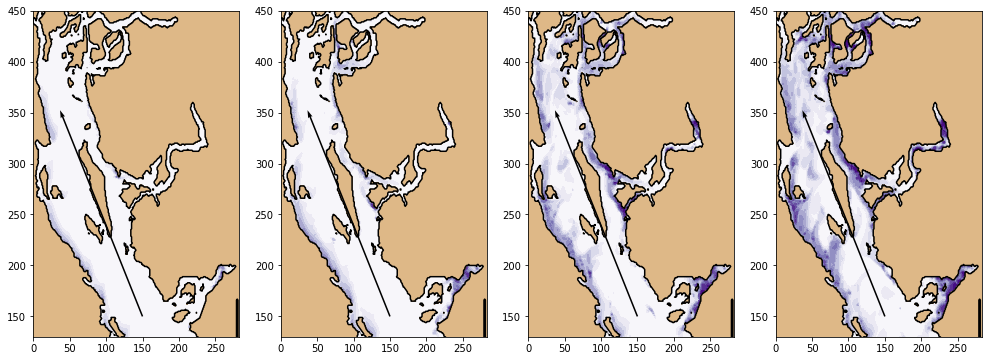

In [107]:
# Plot surface tracer
path = '/data/bmoorema/results/pond/lake/SalishSeaPond_lake_S4d'
fig, axs = plt.subplots(1, 4, figsize=(17, 6))
mask = xr.open_dataset(os.path.join(path, 'mesh_mask.nc'))
T = xr.open_dataset(os.path.join(path, 'SalishSeaIdeal_1h_20170701_20170706_grid_T.nc'))
for ax, t in zip(axs, [40, 60, 80, 94]):
    ax.contourf(T.x, T.y, T.tracer20m[t, 0, ...], levels=np.arange(0, 1.1, 0.1), cmap=plt.get_cmap('Purples'))
    ax.contourf(T.x, T.y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='burlywood')
    ax.contour(T.x, T.y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
    ax.quiver(150, 150, -0.04, 0.1, scale=0.1)
    ax.set_ylim([130, 450])